[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/oscar-ramos/robotica-autonoma-python/blob/main/3-Intro-Vision/3-04-Detectores-Descriptores.ipynb)

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

Si se usa colab se puede utilizar las imágenes del repositorio, de lo contrario se pueden cargar manualmente.

In [1]:
colab = True
if (colab):
    !wget -q https://github.com/oscar-ramos/robotica-autonoma-python/raw/main/3-Intro-Vision/imagenes/jirafa.png
    !wget -q https://github.com/oscar-ramos/robotica-autonoma-python/raw/main/3-Intro-Vision/imagenes/gato1.jpg
    !wget -q https://github.com/oscar-ramos/robotica-autonoma-python/raw/main/3-Intro-Vision/imagenes/blocks.jpg

#1.&nbsp;Detectores

In [3]:
# Imagen de entrada
I = cv2.imread('jirafa.png')
Igray = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

# Forzar a float dado que harris necesita valores grandes
Igray = np.float32(Igray)

## 1.1. Detector de esquinas ("corners") de Harris

Más información se puede encontrar [aquí](https://docs.opencv.org/4.8.0/dc/d0d/tutorial_py_features_harris.html)


In [4]:
nsize = 2    # Tamaño del vecindario (neighborhood)
ksize = 3    # Tamaño del Kernel (para el filtro de Sobel)
k = 0.06     # Valor de k en Harris

# Detector de Harris
Iharris = cv2.cornerHarris(Igray, nsize, ksize, k)

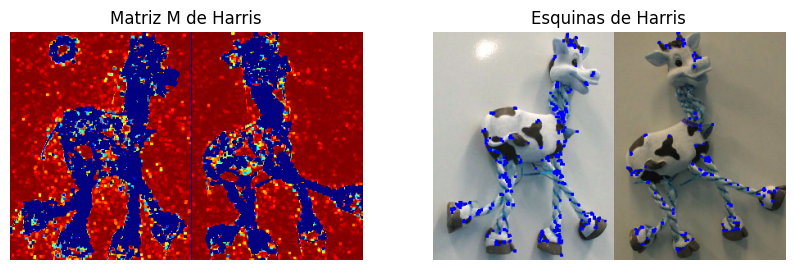

In [5]:
# Dilatar el resultado solo para observar mejor las esquinas (corners)
Iharris_dil = cv2.dilate(Iharris, None)
# Cambiar el mapa de color solo para mostrar
Iharrish = cv2.applyColorMap(cv2.convertScaleAbs(Iharris_dil), cv2.COLORMAP_JET)

# Mostrar las esquinas (corners) si son mayores a th*max (como rojo)
th = 0.01
I[Iharris_dil > th*Iharris_dil.max()] = [0, 0, 255]

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(Iharrish, cmap='gray'); plt.title('Matriz M de Harris'); plt.axis('off')
plt.subplot(122)
plt.imshow(I, cmap='gray'); plt.title('Esquinas de Harris'); plt.axis('off')
plt.show()

## 1.2. Detector de Shi-Tomasi

Más información se puede encontrar [aquí](https://docs.opencv.org/4.8.0/d4/d8c/tutorial_py_shi_tomasi.html)

In [6]:
I = cv2.imread('blocks.jpg')

Igray = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
Igray = np.float32(Igray)

In [7]:
numcorners = 25  # Mejores esquinas a mantener
quality = 0.01   # Debajo de este valor se rechaza
mindist = 10     # Mínima distancia euclideana entre esquinas

# Detector (llamado en OpenCV good features to track)
Icorners = cv2.goodFeaturesToTrack(Igray, numcorners, quality, mindist)
Icorners = np.intp(Icorners)

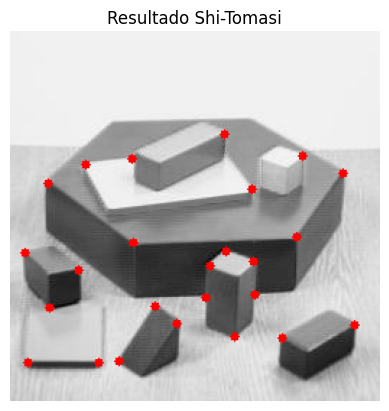

In [8]:
for i in Icorners:
    x,y = i.ravel()
    cv2.circle(I, (x,y), 3, 255, -1)

plt.imshow(I, cmap='gray')
plt.title('Resultado Shi-Tomasi')
plt.axis('off'); plt.show()

## 1.3. Detector FAST

FAST significa "Features from Accelerated Segment Test". Más información se puede encontrar [aquí](https://docs.opencv.org/4.8.0/df/d0c/tutorial_py_fast.html)


In [9]:
Igray = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

# Iniciar del detector FAST con valores por defecto
fast = cv2.FastFeatureDetector_create()

# "Keypoints" usando FAST
keypts = fast.detect(Igray, None)

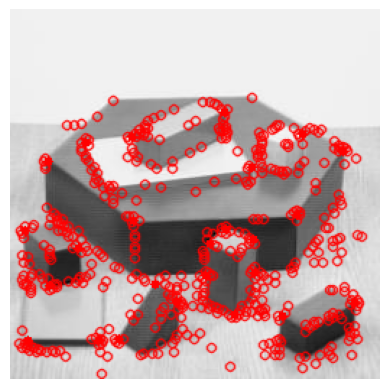

In [ ]:
# Dibujar y mostrar los keypoints en la imagen
Ifast = I.copy()
cv2.drawKeypoints(I, keypts, Ifast, color=(255,0,0))

plt.imshow(Ifast)
plt.axis('off'); plt.show()

In [10]:
# Mostrar los parámetros por defecto
print("Threshold: ", fast.getThreshold())
print("nonmaxSuppression: ", fast.getNonmaxSuppression())
print("neighborhood: ", fast.getType())
print("Keypoints con supresión de no máximos: ", len(keypts))

Threshold:  10
nonmaxSuppression:  True
neighborhood:  2
Keypoints con supresión de no máximos:  476


**Detección sin supresión de no máximos (non-max suppression)**

In [11]:
# Quitar la supresión de no máximos
fast.setNonmaxSuppression(0)
# Realizar la detección
keypts2 = fast.detect(Igray, None)

Keypoints sin supresión de no máximos:  2052


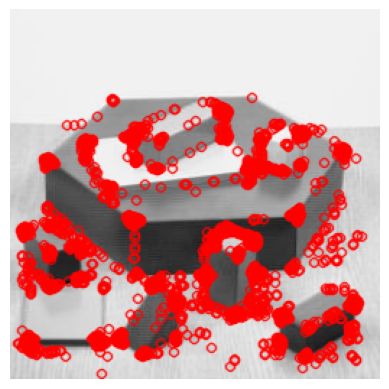

In [12]:
print("Keypoints sin supresión de no máximos: ", len(keypts2))

Ifast2 = I.copy()
cv2.drawKeypoints(I, keypts2, Ifast2, color=(255,0,0))

plt.imshow(Ifast2)
plt.axis('off'); plt.show()

# 2.&nbsp;Descriptores

In [13]:
I = cv2.imread('blocks.jpg')
Igray = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

## 2.1. SIFT

SIFT significa "Scale-Invariant Feature Transform". Se puede obtener más información [aquí](https://docs.opencv.org/4.8.0/da/df5/tutorial_py_sift_intro.html).

In [14]:
# Inicializar un descriptor SIFT
sift = cv2.SIFT_create()

# Obtener puntos característicos
keypts = sift.detect(Igray, None)

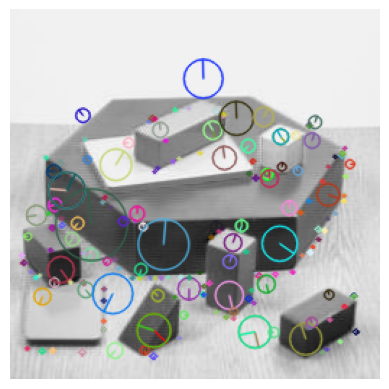

In [15]:
# Dibujar los keypoints sobre la imagen
Isift = I.copy()
cv2.drawKeypoints(Igray, keypts, Isift, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(Isift)
plt.axis('off'); plt.show()

In [16]:
# Cálculo de los descriptores a partir de los keypoints calculados
out = sift.compute(Igray,keypts)

keypoints = out[0]
descriptores = out[1]

print("Cantidad de keypoints:", len(keypoints))
print("Cantidad de descriptores:", len(descriptores))
print("Tamaño de cada descriptor:", descriptores[0].shape)

Cantidad de keypoints: 187
Cantidad de descriptores: 187
Tamaño de cada descriptor: (128,)


In [17]:
# Ejemplo de valor de un descriptor
descriptores[0]

array([105.,  93.,   0.,   0.,   0.,   0.,   2.,   3., 189., 115.,   0.,
         0.,   0.,   0.,   0.,   1.,  43.,   6.,   0.,   3.,   5.,   3.,
         5.,   4.,   0.,   0.,   0.,   2.,   8.,   5.,   7.,   0.,  92.,
        19.,   0.,   0.,   0.,   0.,  18.,  15., 189.,  93.,   0.,   0.,
         0.,   0.,   0.,   9., 101.,   8.,   0.,   0.,   0.,   3.,  30.,
        25.,   0.,   0.,   0.,   0.,   0.,   6.,  36.,   1.,  56.,   1.,
         0.,   0.,   0.,   0.,  15.,  24., 189.,   9.,   0.,   0.,   0.,
         0.,   0.,  32., 155.,   1.,   0.,   0.,   0.,   1.,  13.,  32.,
         0.,   0.,   0.,   0.,   0.,   4.,  21.,   4.,  42.,   0.,   0.,
         0.,   0.,  22.,  12.,  15., 189.,   2.,   0.,   0.,   0.,   0.,
         0.,  27., 132.,   1.,   0.,   0.,   0.,   0.,   6.,  29.,   0.,
         0.,   1.,   0.,   0.,   0.,   9.,   6.], dtype=float32)

**NOTA**: La función anterior `compute` asume que se obtuvo los keypoints usando `detect`. Alternativamente, se puede obtener los descriptores y keypoints a la vez usando la función `detectAndCompute`.

In [18]:
keypts, descriptors = sift.detectAndCompute(Igray, None)

print("Cantidad de descriptores:", len(descriptors))

Cantidad de descriptores: 187


## 2.2. ORB

ORB significa Oriented FAST and Rotated BRIEF
Más información en la [documentación](https://docs.opencv.org/4.8.0/db/d95/classcv_1_1ORB.html) y en este [tutorial](https://docs.opencv.org/4.8.0/d1/d89/tutorial_py_orb.html).

In [19]:
# Inicializar detector ORB
MAX_NUM_FEATURES = 500
orb = cv2.ORB_create(MAX_NUM_FEATURES)

# "Keypoints" y descriptores con ORB
keypts, descript_orb = orb.detectAndCompute(I, None)

# La instrucción anterior se podría separar en 2 pasos
if (False):
    keypts = orb.detect(I, None)
    keypts, descript_orb = orb.compute(I, keypts)

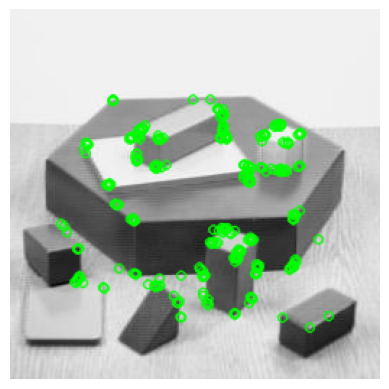

In [20]:
# Dibujar los "keypoints" (sin incluir tamaño ni orientación)
Iorb = I.copy()
cv2.drawKeypoints(I, keypts, Iorb, color=(0,255,0), flags=0)

plt.imshow(Iorb)
plt.axis('off'); plt.show()

## 2.3. Descriptor BRIEF con detector STAR

* BRIEF (Binary Robust Independent Elementary Features)
* STAR (STAR Detector, llamado CenSurE: Center Surround Extremas)

Mayor detalle sobre el funcionamiento se puede encontrar [aquí](https://docs.opencv.org/4.8.0/dc/d7d/tutorial_py_brief.html).

In [21]:
# Inicializar el detector STAR
star = cv2.xfeatures2d.StarDetector_create()
# Inicializar el descriptor BRIEF
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

# Encontrar "keypoints" usando STAR (CenSurE)
keypts = star.detect(I, None)
# Calcular los descriptores usando BRIEF
keypts, descript_brief = brief.compute(I, keypts)

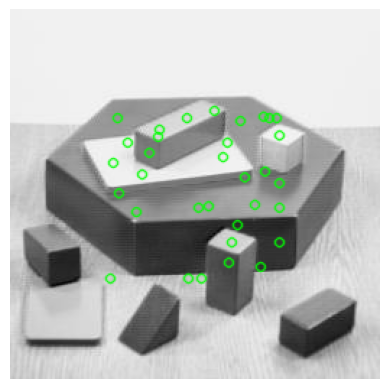

In [22]:
# Dibuja los "keypoints" (sin incluir tamaño ni orientación)
Ibrief = I.copy()
cv2.drawKeypoints(I, keypts, Ibrief, color=(0,255,0), flags=0)

plt.imshow(Ibrief)
plt.axis('off'); plt.show()

## 2.4 BRISK con detector FAST

* FAST (Features from Accelerated Segment Test)
* BRISK (Binary Robust Invariant Scalable Keypoints)

In [23]:
# Iniciar del detector FAST con valores por defecto
fast = cv2.FastFeatureDetector_create()

# "Keypoints" usando FAST
keypts = fast.detect(Igray, None)

# Descriptores usando BRISK (a partir de puntos dados por FAST)
br = cv2.BRISK_create();
keypts, descript_brisk = br.compute(I, keypts)

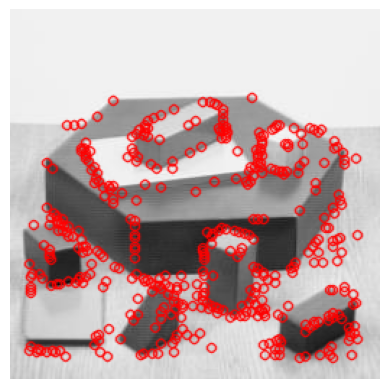

In [24]:
# Dibujar y mostrar los keypoints en la imagen
Ifast = I.copy()
cv2.drawKeypoints(I, keypts, Ifast, color=(255,0,0))

plt.imshow(Ifast)
plt.axis('off'); plt.show()

## 2.5. SURF

SURF significa "Speeded-Up Robust Features". Más información se puede encontrar [aquí](https://docs.opencv.org/4.8.0/df/dd2/tutorial_py_surf_intro.html).

Nota: SURF tiene patentes vigentes, por lo que solo se puede utilizar con el paquete `opencv-contrib-python-nonfree` seleccionando la opción `OPENCV_ENABLE_NONFREE` al momento de compilar. En Google Colab no estará disponible.

In [25]:
use_surf = False
if (use_surf):
    hessian_threshold = 4000

    # Inicialización de SURF
    surf = cv2.xfeatures2d.SURF_create(hessian_threshold)
    # Obtención de descriptores y keypoints
    keypoints, descriptors = surf.detectAndCompute(Igray, None)

    Isurf = I.copy()
    cv2.drawKeypoints(Igray, keypoints, Isurf, (255,0,0), 4)

    plt.imshow(Isurf)
    plt.axis('off'); plt.show()

# 3.&nbsp;HoG

HoG = "Histogram of Gradients"

In [26]:
from skimage.feature import hog
from skimage import exposure

In [27]:
I = cv2.imread('gato1.jpg')

# Convertir de BGR en RGB
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)

# descr_hog: descriptor de HoG
# Ihog: Imagen con características de HoG
descr_hog, Ihog = hog(I, orientations=8, pixels_per_cell=(16, 16),
                      cells_per_block=(1, 1), visualize=True, channel_axis=-1)

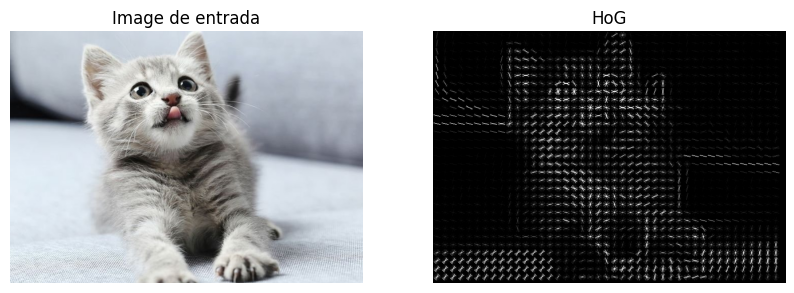

In [29]:
# Mejorar el nivel de gris para mostrar la imagen
Ihog = exposure.rescale_intensity(Ihog, in_range=(0, 10))

plt.figure(figsize=(10,10))
plt.subplot(1,2,1); plt.imshow(I, cmap='gray')
plt.title('Image de entrada'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(Ihog, cmap='gray')
plt.title('HoG'); plt.axis('off')
plt.show()